# Reddit data sentiment analysis

In [1]:
#!pip install praw
#!pip install --upgrade pandas

In [2]:
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reddit API Connection
#store reddit accout info in JSON format in reddit_acct.txt
with open('reddit_acct.txt','r') as f:
    reddit_acct = f.read()

#conver data in json
import json
acct_json = json.loads(reddit_acct)
#print(acct_json)

username = acct_json['username']
client_id = acct_json['client_id'] 
client_secret = acct_json['client_secret']

#connect Reddit used praw
import praw
user_agent = "Scraper 1.0 by /u/media-data-projects"
reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    user_agent=user_agent
)

In [4]:
#hot new rising top in politics
headlines = set()
for submission in reddit.subreddit('politics').hot(limit=None):
    #print(submission.title)
    #print(submission.id)
    #print(submission.author)
    #print(submission.created_utc)
    #print(submission.score)
    #print(submission.upvote_ratio)
    #print(submission.url)
    #break
    headlines.add(submission.title)
print(len(headlines))  

755


In [5]:
df = pd.DataFrame(headlines)
df.head()

,0
0,Republican Senate candidate Larry Hogan calls ...
1,Energy Department commits $360 million to powe...
2,Ex-NBA player running for US Senate comes unde...
3,Georgia judge dismisses voting machine securit...
4,Donald Trump's Call for 'Really Violent Day' C...


In [6]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Ada\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
result = []

for line in headlines:
    pol_score = sia.polarity_scores(line) # -> dict
    pol_score['headline'] = line
    result.append(pol_score)
    
pprint(result[:3], width=100)

[{'compound': -0.1027,
  'headline': 'Republican Senate candidate Larry Hogan calls JD Vance ‘crazy’ for refusing to '
              'endorse 2020 election result',
  'neg': 0.142,
  'neu': 0.737,
  'pos': 0.121},
 {'compound': 0.296,
  'headline': 'Energy Department commits $360 million to power line connecting Texas grid to '
              'Mississippi',
  'neg': 0.0,
  'neu': 0.775,
  'pos': 0.225},
 {'compound': -0.296,
  'headline': 'Ex-NBA player running for US Senate comes under fire for resurfaced comment that '
              "'bad guys' won WWII",
  'neg': 0.25,
  'neu': 0.593,
  'pos': 0.157}]


In [8]:
df = pd.DataFrame.from_records(result)
df.head()

,neg,neu,pos,compound,headline
0,0.142,0.737,0.121,-0.1027,Republican Senate candidate Larry Hogan calls ...
1,0.000,0.775,0.225,0.2960,Energy Department commits $360 million to powe...
2,0.250,0.593,0.157,-0.2960,Ex-NBA player running for US Senate comes unde...
3,0.000,0.714,0.286,0.3400,Georgia judge dismisses voting machine securit...
4,0.295,0.705,0.000,-0.6361,Donald Trump's Call for 'Really Violent Day' C...


In [9]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] =1
df.loc[df['compound'] <-0.2, 'label'] =-1
df.head()

,neg,neu,pos,compound,headline,label
0,0.142,0.737,0.121,-0.1027,Republican Senate candidate Larry Hogan calls ...,0
1,0.000,0.775,0.225,0.2960,Energy Department commits $360 million to powe...,1
2,0.250,0.593,0.157,-0.2960,Ex-NBA player running for US Senate comes unde...,-1
3,0.000,0.714,0.286,0.3400,Georgia judge dismisses voting machine securit...,1
4,0.295,0.705,0.000,-0.6361,Donald Trump's Call for 'Really Violent Day' C...,-1


In [10]:
df2 = df[['headline','label']]

In [11]:
df2.to_csv('reddit_headlines_labels.csv', encoding='utf-8', index=False)

In [12]:
df.label.value_counts()

 0    310
-1    272
 1    173
Name: label, dtype: int64

In [13]:
df.label.value_counts(normalize=True) * 100

 0    41.059603
-1    36.026490
 1    22.913907
Name: label, dtype: float64

In [14]:
print("Positive hedlines:\n")
pprint(list(df[df['label']==1].headline)[:5], width=200)

print("\nNegative hedlines:\n")
pprint(list(df[df['label']==-1].headline)[:5], width=200)

Positive hedlines:

['Energy Department commits $360 million to power line connecting Texas grid to Mississippi',
 'Georgia judge dismisses voting machine security concerns',
 'How Child Marriage Survivor Naila Amin Plans to End the Practice in the U.S.',
 "Trump's Candidates Are Falling Behind Even in States He's Winning",
 'Trump averages more than 24 Truth Social posts a day and he was even busier during the VP debate | A new Roll Call Factba.se analysis found former president Trump posted on his social media site '
 'nearly 9,000 times in 2024.']

Negative hedlines:

["Ex-NBA player running for US Senate comes under fire for resurfaced comment that 'bad guys' won WWII",
 "Donald Trump's Call for 'Really Violent Day' Compared to 'The Purge'",
 'Trump caught lying repeatedly about response to Hurricane Helene',
 'Prosecutors: Trump ‘resorted to crimes’ after losing 2020 election in failed bid to cling to power',
 'Trump’s Jan. 6 role back in focus as he readies new stolen election cl

C:\Users\Ada\AppData\Local\Temp\ipykernel_10712\1052011833.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels("Percentage")


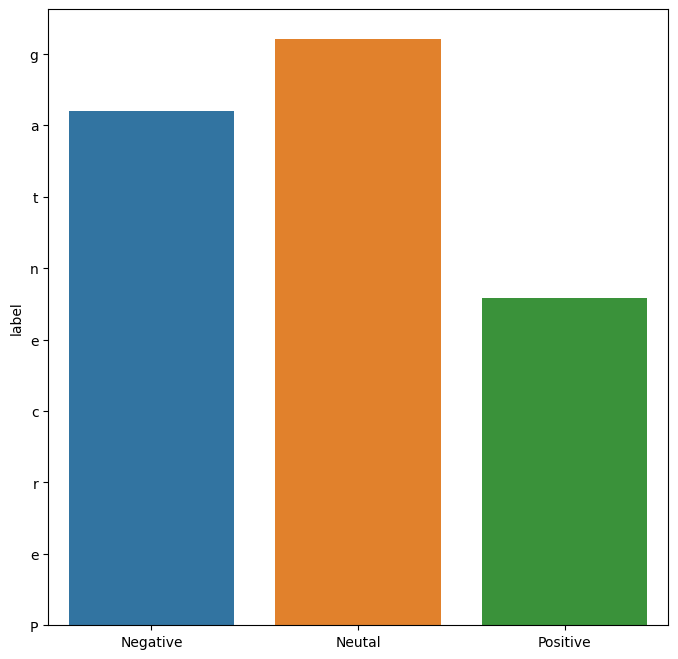

In [15]:
fig, ax = plt.subplots(figsize=(8,8))

counts = df.label.value_counts(normalize=True) *100

sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['Negative','Neutal','Positive'])
ax.set_yticklabels("Percentage")

plt.show()
